In [20]:
import sys
# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..") 

import cocpit.plotting_scripts.plot as plot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")


import torch
import matplotlib.cm as cm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


In [8]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [9]:
# rename models for plotting
model_names = [
    "efficient",
    "resnet18",
    "resnet34",
    "resnet152",
    "alexnet",
    "vgg16",
    "vgg19",
    "densenet169",
    "densenet201",
]
new_names = [
    "Efficient-b0",
    "ResNet-18",
    "ResNet-34",
    "ResNet-152",
    "AlexNet",
    "VGG-16",
    "VGG-19",
    "DenseNet-169",
    "DenseNet-201",
]
convert_names = {model_names[i]: new_names[i] for i in range(len(new_names))}
convert_names

{'efficient': 'Efficient-b0',
 'resnet18': 'ResNet-18',
 'resnet34': 'ResNet-34',
 'resnet152': 'ResNet-152',
 'alexnet': 'AlexNet',
 'vgg16': 'VGG-16',
 'vgg19': 'VGG-19',
 'densenet169': 'DenseNet-169',
 'densenet201': 'DenseNet-201'}

### plot batch size vs val acc for vgg16

Batch Size
32      96.378717
64      96.985636
128     96.783330
256     96.115719
512     96.237103
1024    95.023265
Name: Accuracy, dtype: float64


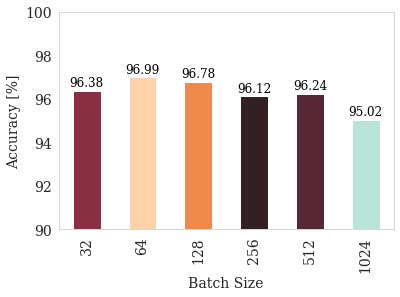

In [10]:
val_csv = "/data/data/saved_accuracies/v1.0.0/save_val_acc_loss_batchsize_comparew16_32_e20_bs32_k0_1models_no_blank.csv"
save_name = "/data/data/plots/batch_size_vs_val_acc.pdf"
plot.batch_size_accuracy_bar(val_csv, save_name, save_fig=False)

<AxesSubplot:xlabel='Epoch'>

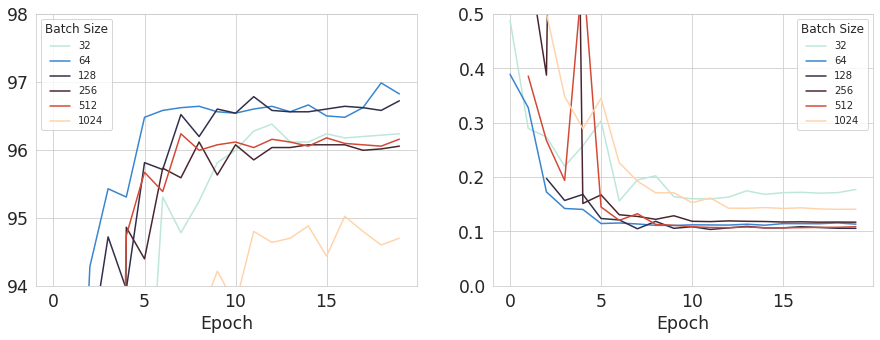

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df_val = pd.read_csv(
    val_csv, names=["Model", "Epoch", "Batch Size", "Accuracy", "Loss"]
)

df_val["Accuracy"] = df_val["Accuracy"] * 100
df = df_val.pivot_table(index='Epoch', columns='Batch Size', values='Accuracy')
df.plot(ylim=[94,98], ax=ax1, cmap=cm.get_cmap("icefire"))
df = df_val.pivot_table(index='Epoch', columns='Batch Size', values='Loss')
df.plot(ylim=[0.0,0.5], ax=ax2, cmap=cm.get_cmap("icefire"))


## plot training and validation accuracy and loss

In [12]:
train_csv = "/data/data/saved_accuracies/v1.0.0/save_train_acc_loss_e20_bs64_k5_9models_no_blank.csv"
df_train = pd.read_csv(
    train_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)

df_train.replace(convert_names, inplace=True)
df_train.head()

,Model,Epoch,Kfold,Batch Size,Accuracy,Loss
0,Efficient-b0,0,0,64,0.598796,1.244361
1,Efficient-b0,1,0,64,0.878086,0.337488
2,Efficient-b0,2,0,64,0.926851,0.210141
3,Efficient-b0,3,0,64,0.945569,0.160277
4,Efficient-b0,4,0,64,0.957608,0.132710


In [13]:
val_csv = "/data/data/saved_accuracies/v1.0.0/save_val_acc_loss_e20_bs64_k5_9models_no_blank.csv"
df_val = pd.read_csv(
    val_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)
df_val.replace(convert_names, inplace=True)
df_val.head()

,Model,Epoch,Kfold,Batch Size,Accuracy,Loss
0,Efficient-b0,0,0,64,0.135141,3.007321
1,Efficient-b0,1,0,64,0.835525,0.479147
2,Efficient-b0,2,0,64,0.827837,0.461430
3,Efficient-b0,3,0,64,0.914424,0.230426
4,Efficient-b0,4,0,64,0.892575,0.272835


In [14]:
colors = {
    "Efficient-b0": "#C76114",
    "ResNet-18": "#CAE1FF",
    "ResNet-34": "#3063A5",
    "ResNet-152": "#162252",
    "AlexNet": "#FCDC3B",
    "VGG-16": "#CD9B9B",
    "VGG-19": "#9E0508",
    "DenseNet-169": "#9CBA7F",
    "DenseNet-201": "#006633",
}
num_epochs = 20
kfold = 5
num_models = len(model_names)

In [15]:
# reshape data
if kfold == 0:
    val_accs = df_val["Accuracy"].values.reshape(num_models, num_epochs)
    val_losses = df_val["Loss"].values.reshape(num_models, num_epochs)
    train_accs = df_train["Accuracy"].values.reshape(num_models, num_epochs)
    train_losses = df_train["Loss"].values.reshape(num_models, num_epochs)
else:
    val_accs = np.average(
        df_val["Accuracy"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    val_losses = np.average(
        df_val["Loss"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    train_accs = np.average(
        df_train["Accuracy"].values.reshape(num_models, kfold, num_epochs), axis=1
    )
    train_losses = np.average(
        df_train["Loss"].values.reshape(num_models, kfold, num_epochs), axis=1
    )

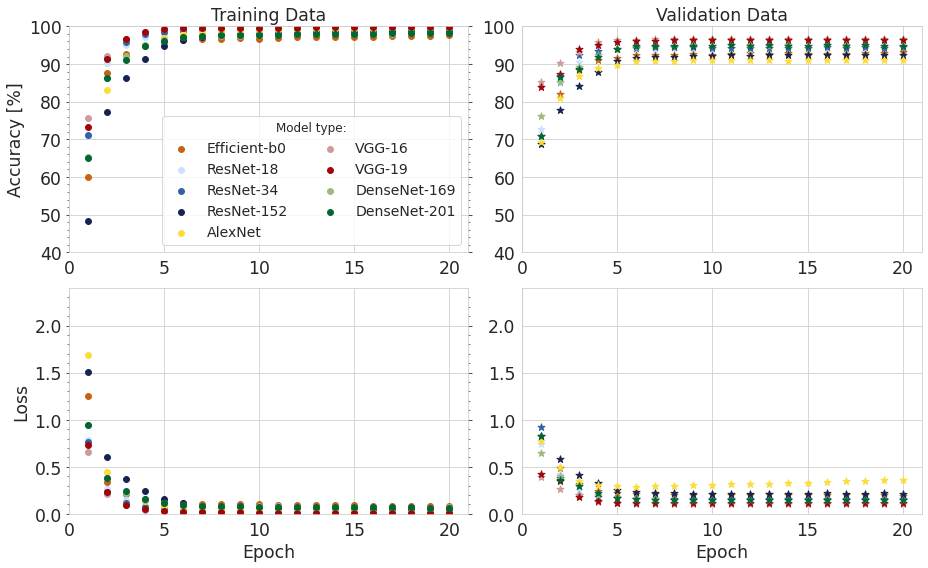

In [16]:
save_name = "/data/data/plots/loss_acc_9models_bs64_e20_9classes_avg5kfold_noblank.pdf"
plot.train_val_acc_loss(
    model_names,
    num_models,
    num_epochs,
    train_accs,
    colors,
    new_names,
    val_accs,
    train_losses,
    val_losses,
    save_name,
    save_fig=False,
)

### plot accuracy/loss curves for balanced vs unbalanced random samplers

In [17]:
val_csv_unbalanced = "/data/data/saved_accuracies/v1.3.0/save_val_acc_loss_e20_bs64_k0_1models_unbalanced_v1.3.0.csv"
num_epochs = 20
df_val_unbalanced = pd.read_csv(
    val_csv_unbalanced, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)
train_csv_unbalanced = "/data/data/saved_accuracies/v1.3.0/save_train_acc_loss_e20_bs64_k0_1models_unbalanced_v1.3.0.csv"
df_train_unbalanced = pd.read_csv(
    train_csv_unbalanced, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)

val_csv = "/data/data/saved_accuracies/v1.3.0/save_val_acc_loss_e20_bs64_k0_1models_balanced_v1.3.0.csv"
df_val = pd.read_csv(
    val_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)
train_csv = "/data/data/saved_accuracies/v1.3.0/save_train_acc_loss_e20_bs64_k0_1models_balanced_v1.3.0.csv"
df_train = pd.read_csv(
    train_csv, names=["Model", "Epoch", "Kfold", "Batch Size", "Accuracy", "Loss"]
)

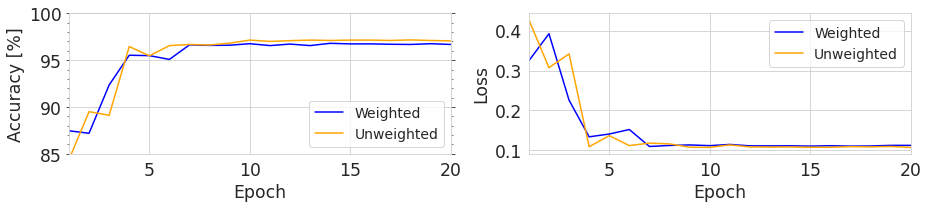

In [18]:
save_name = "/data/data/plots/unweighted_weighted_sampler_loss_acc_curves.png"
num_epochs=20
plot.balance_diff_accuracy(num_epochs, df_val, df_val_unbalanced, 
                         df_train, df_train_unbalanced, save_fig=False)

### plot time it takes to train different models

In [19]:
time_csv = "/data/data/saved_timings/model_timing2.csv"
save_name = "/data/data/plots/training_time.pdf"
plot_timing.model_timing(time_csv, convert_names, colors, save_name, save_fig=False)

NameError: name 'plot_timing' is not defined

## plot cross validation

In [ ]:
num_models = 9
kfold = 5
num_epochs = 20
val_accs = df_val["Accuracy"].values.reshape(num_models, kfold, num_epochs)
val_accs_avg = np.average(
    df_val["Accuracy"].values.reshape(num_models, kfold, num_epochs), axis=1
)

In [ ]:
val_accs_avg = {new_names[i]: val_accs_avg[i, -1] for i in range(len(model_names))}
val_accs_avg

{'Efficient-b0': 0.9308405830514813,
 'ResNet-18': 0.944114102713467,
 'ResNet-34': 0.9450042749587302,
 'ResNet-152': 0.9252562171114116,
 'AlexNet': 0.9100404178660607,
 'VGG-16': 0.9669378711728926,
 'VGG-19': 0.9629315843677413,
 'DenseNet-169': 0.9492130318000764,
 'DenseNet-201': 0.9489705753644972}

In [ ]:
val_accs_avg_sort = dict(sorted(val_accs_avg.items(), key=lambda x: x[1]))
val_accs_avg_sort

{'AlexNet': 0.9100404178660607,
 'ResNet-152': 0.9252562171114116,
 'Efficient-b0': 0.9308405830514813,
 'ResNet-18': 0.944114102713467,
 'ResNet-34': 0.9450042749587302,
 'DenseNet-201': 0.9489705753644972,
 'DenseNet-169': 0.9492130318000764,
 'VGG-19': 0.9629315843677413,
 'VGG-16': 0.9669378711728926}

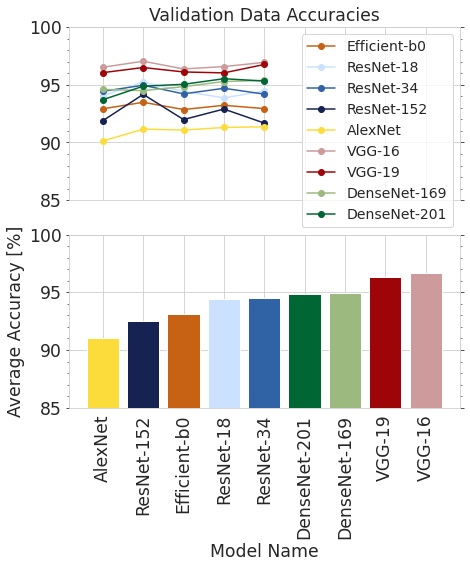

In [ ]:
plot.val_acc_fold_bar(colors, kfold, num_models, new_names, val_accs_avg_sort, val_accs)